In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from feature_builder import process_dataset
import seaborn as sns

In [35]:
x_train = pd.read_csv('train.csv')
y_train=x_train[['id','target']]

In [36]:
x_train_features = process_dataset(x_train)
x_train_feat, x_test_feat, y_train_feat, y_test_feat = train_test_split(x_train_features, y_train, test_size = .33, random_state = 17)

In [37]:
rforest = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=4)

rforest.fit(x_train_feat, y_train_feat['target'])

predictions=rforest.predict(x_test_feat)

Text(0, 0.5, 'Features')

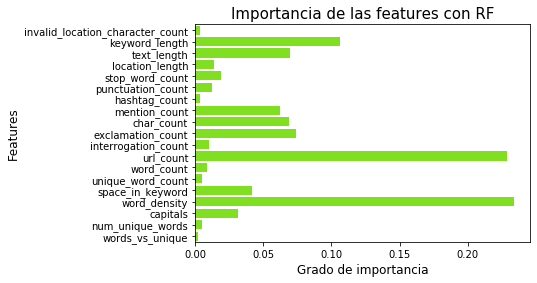

In [38]:
#En clase recomendaron usar RF para feature importance
#En base a estas metricas se puede determinar la importancia de las features para saber su efecto
g = sns.barplot(rforest.feature_importances_, x_train_feat.columns, orient='h', color='chartreuse')
g.set_title("Importancia de las features con RF", fontsize=15)
g.set_xlabel("Grado de importancia", fontsize=12)
g.set_ylabel("Features", fontsize=12)